Run the cell below if you are using Google Colab to mount your Google Drive in your Colab instance. Adjust the path to the files in your Google Drive as needed if it differs.

If you do not use Google Colab, running the cell will simply do nothing, so do not worry about it.

In [1]:
try:
    from google.colab import drive
    drive.mount('/content/drive/')
    %cd 'drive/My Drive/Colab Notebooks/04_Classification'
except ImportError as e:
    pass

## Exercise 4: Classification

### 4.1. Learning a classifier for the Iris Data Set – Part II

In the last exercise, you have learned classification models for the Iris dataset using a train/test split. Now try learning a decision tree and evaluate it with 10-fold cross-validation. Use a pipeline to perform some preprocessing before learning or applying the decision tree classifier. For this exercise, we use the ```iris_imbalanced.csv``` dataset, so it's a good idea to include a balancing step in the preprocessing!

#### 4.1.1.	Discretise the Iris data set into three bins. Then use the DecisionTreeClassifier with a 10-fold stratified cross validation and compute the accuracy. Afterwards plot the decision tree.

Fitted a decision tree with 31 nodes. Cross-validated accuracy is 94.57142857142857%


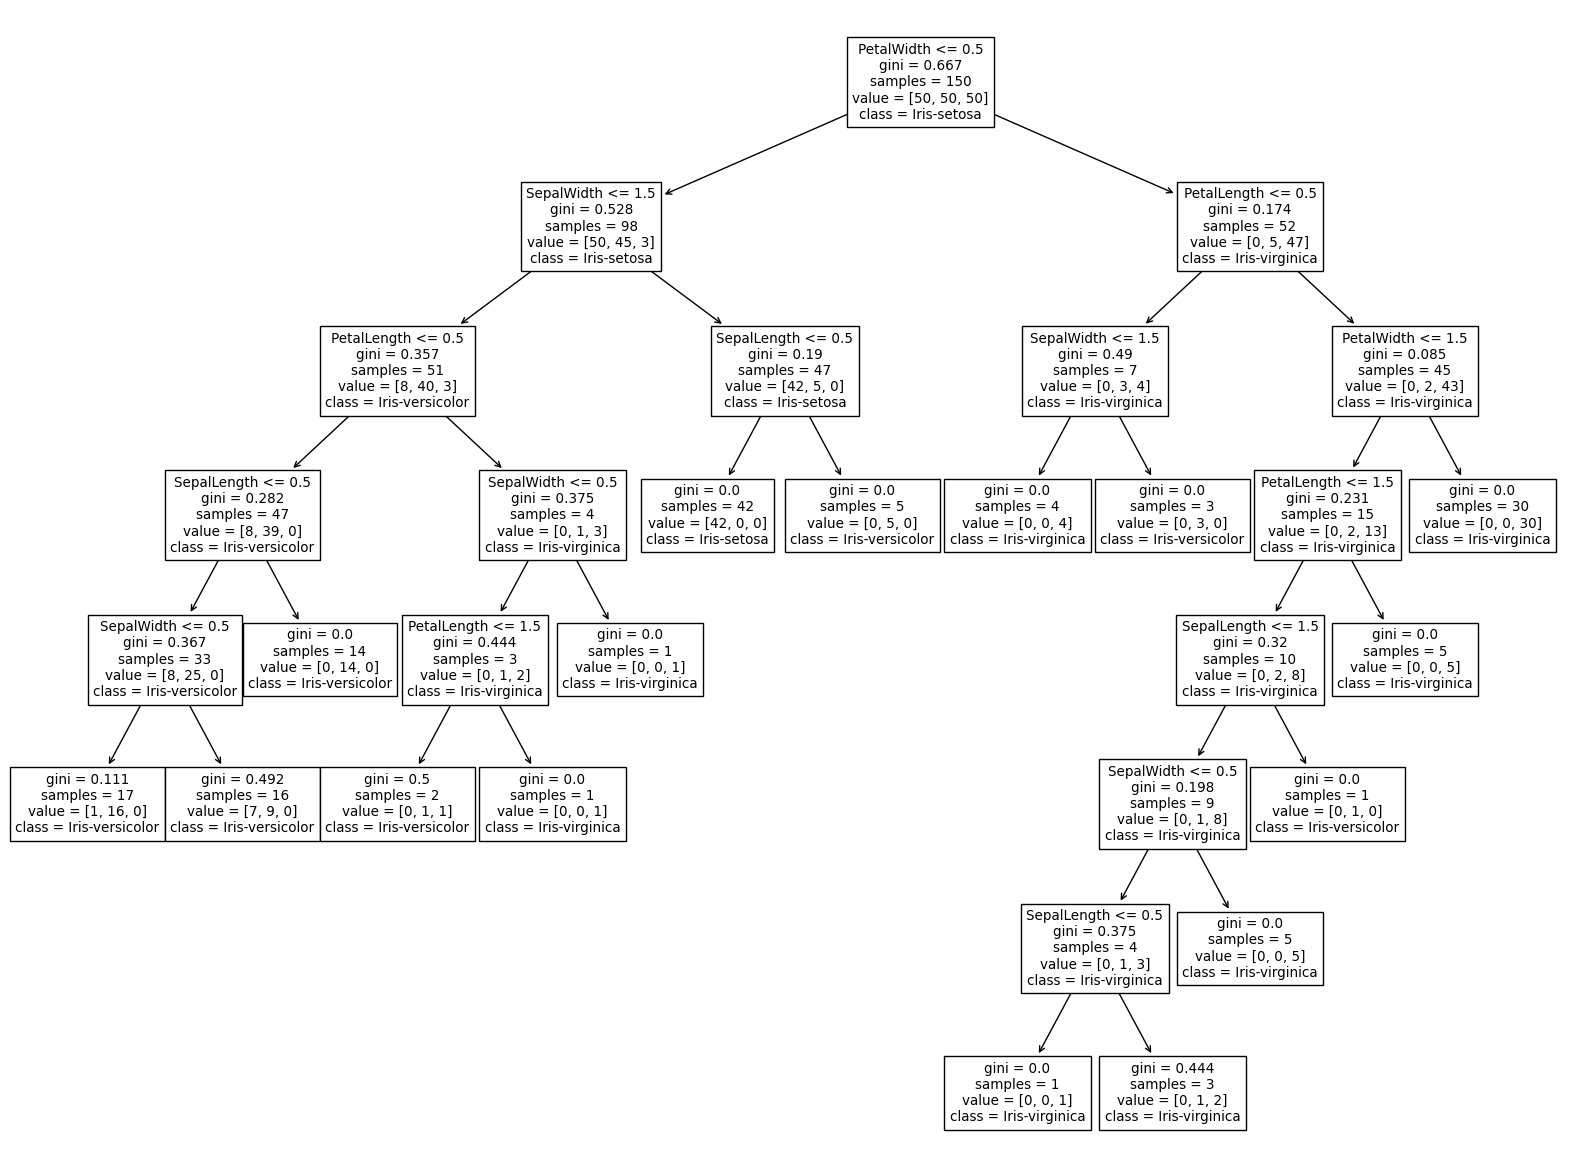

In [2]:
import pandas as pd
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

## Windows users: either add the path to graphviz' dot.exe to your PATH variable 
## OR comment in the 2 lines below (may have to change path):

# import os
# os.environ['PATH'] += ';C:\\Program Files (x86)\\Graphviz2.38\\bin'

iris = pd.read_csv("iris_imbalanced.csv")
iris_data = iris[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']]
iris_target = iris['Name']

discretiser = preprocessing.KBinsDiscretizer(n_bins=3, encode='ordinal')
sampler = RandomUnderSampler()
estimator = DecisionTreeClassifier()
pipeline = Pipeline([ ('discretiser', discretiser), ('sampler', sampler), ('estimator', estimator)])

accuracy = cross_val_score(pipeline, iris_data, iris_target, cv=10, scoring='accuracy')

pipeline.fit(iris_data, iris_target)

print("Fitted a decision tree with {} nodes. Cross-validated accuracy is {}%".format(estimator.tree_.node_count, accuracy.mean() * 100))

import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,15))
tree.plot_tree(estimator,
               feature_names=iris_data.columns, 
               class_names=iris_target.unique())
plt.show()

#### 4.1.2.	Remove the discretization and adjust the max_depth parameter of DecisionTreeClassifier to increase the accuracy. Does the accuracy change? Compare the complexity of the two models. Which model should be preferred according to Occam’s razor?

Fitted a decision tree with 17 nodes. Cross-validated accuracy is 95.42857142857143%


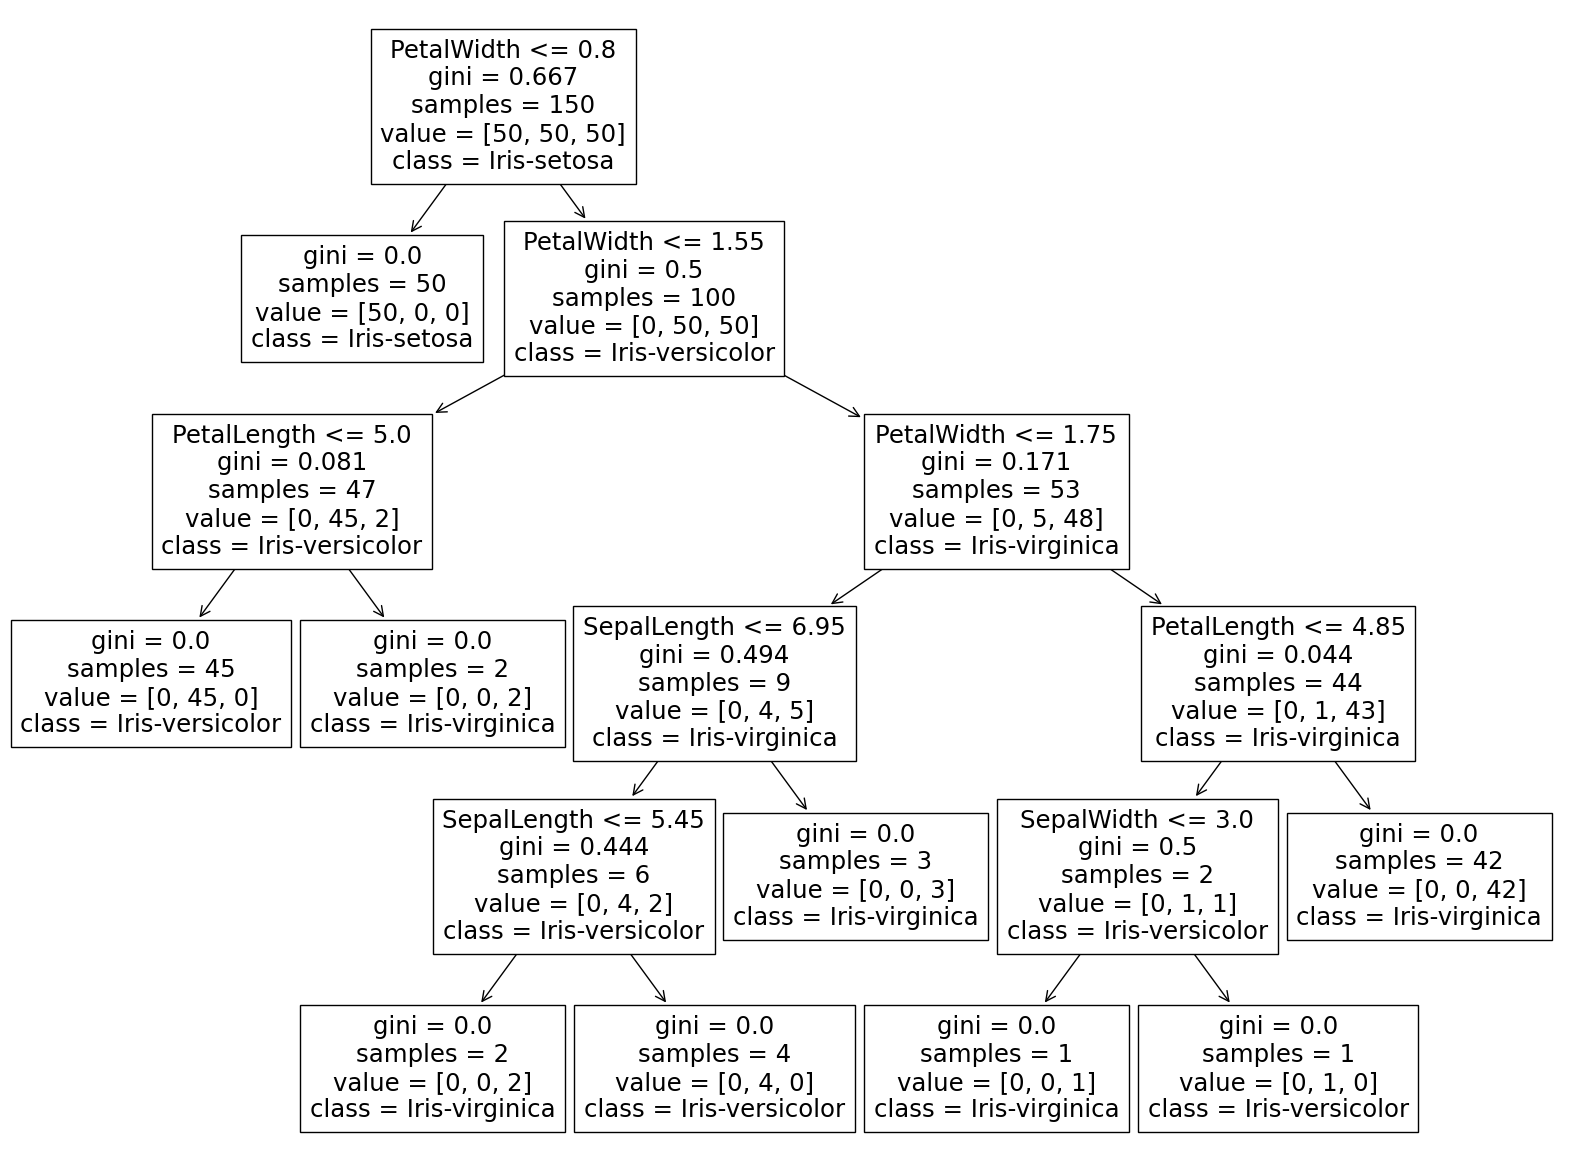

In [3]:
pipeline.set_params(discretiser=None)

accuracy = cross_val_score(pipeline, iris_data, iris_target, cv=10, scoring='accuracy')

pipeline.fit(iris_data, iris_target)

print("Fitted a decision tree with {} nodes. Cross-validated accuracy is {}%".format(estimator.tree_.node_count, accuracy.mean() * 100))

plt.figure(figsize=(20,15))
tree.plot_tree(estimator,
               feature_names=iris_data.columns, 
               class_names=iris_target.unique())
plt.show()

In [4]:
for depth in range(1, 9):
    pipeline.set_params(estimator__max_depth=depth)
    accuracy = cross_val_score(pipeline, iris_data, iris_target, cv=10, scoring='accuracy')
    print("max_depth={}: {}% accuracy".format(depth, accuracy.mean()*100))

max_depth=1: 28.57142857142857% accuracy
max_depth=2: 94.0% accuracy
max_depth=3: 96.0% accuracy
max_depth=4: 95.71428571428571% accuracy
max_depth=5: 94.57142857142857% accuracy
max_depth=6: 96.0% accuracy
max_depth=7: 96.57142857142857% accuracy
max_depth=8: 96.0% accuracy


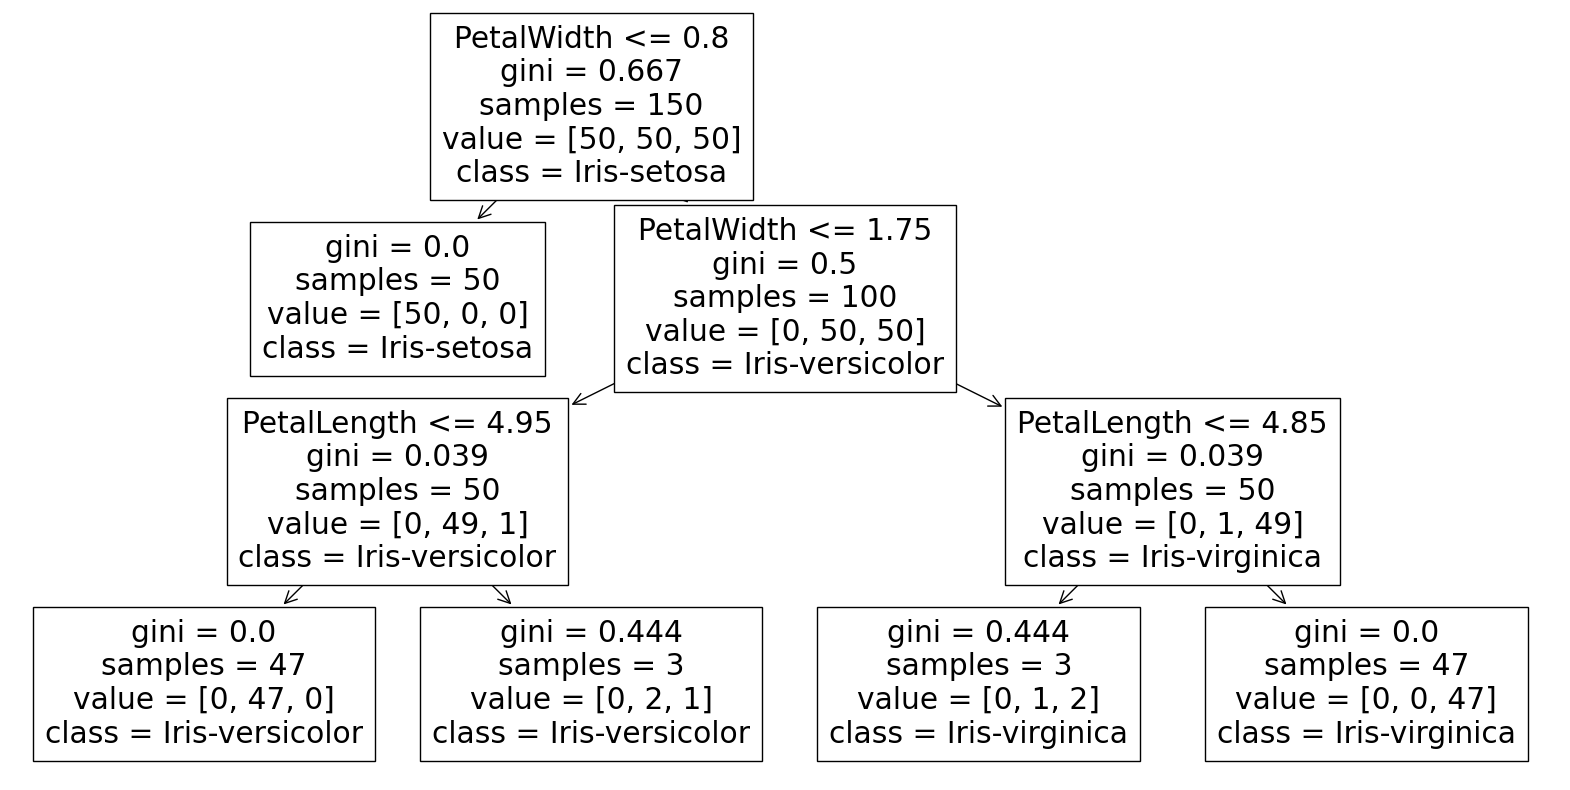

In [5]:
#choose 3
pipeline.set_params(estimator__max_depth=3)
pipeline.fit(iris_data, iris_target)

plt.figure(figsize=(20,10))
tree.plot_tree(estimator,
               feature_names=iris_data.columns, 
               class_names=iris_target.unique())
plt.show()

Solution: Occam’s Razor: Given two models of similar generalization errors, one should prefer the simpler model over the more complex model.

Conclusion: We choose the simpler model with comparable accuracy.

### 4.2. Who should get a bank credit?
The German credit data set from the UCI data set library (http://archive.ics.uci.edu/ml/index.html) describes the customers of a bank with respect to whether they should get a bank credit or not. The data set is provided as credit-g.arff file in ILIAS. 

#### 4.2.1. Plot ROC curves for k-NN (different k values) and Decision Tree (you can use the given avg_roc function) . Which classification approach looks most promising to you?

In [6]:
from scipy.io import arff
credit_arff_data, credit_arff_meta = arff.loadarff(open('credit-g.arff', 'r'))
credit = pd.DataFrame(credit_arff_data)
# select all columns of type object
columns_with_binary_strings = credit.select_dtypes('object').columns.values

# decode the values of these columns using utf-8
credit[columns_with_binary_strings] = credit[columns_with_binary_strings].apply(lambda x: x.str.decode("utf-8"))
credit.head()

checking_status  duration                  credit_history  \
0              <0       6.0  critical/other existing credit   
1        0<=X<200      48.0                   existing paid   
2     no checking      12.0  critical/other existing credit   
3              <0      42.0                   existing paid   
4              <0      24.0              delayed previously   

               purpose  credit_amount    savings_status employment  \
0             radio/tv         1169.0  no known savings        >=7   
1             radio/tv         5951.0              <100     1<=X<4   
2            education         2096.0              <100     4<=X<7   
3  furniture/equipment         7882.0              <100     4<=X<7   
4              new car         4870.0              <100     1<=X<4   

   installment_commitment     personal_status other_parties  ...  \
0                     4.0         male single          none  ...   
1                     2.0  female div/dep/mar          none  ...   
2                     2.0         male single          none  ...   
3                     2.0         male single     guarantor  ...   
4                     3.0         male single          none  ...   

   property_magnitude   age  other_payment_plans   housing existing_credits  \
0         real estate  67.0                 none       own              2.0   
1         real estate  22.0                 none       own              1.0   
2         real estate  49.0                 none       own              1.0   
3      life insurance  45.0                 none  for free              1.0   
4   no known property  53.0                 none  for free              2.0   

                  job num_dependents  own_telephone foreign_worker class  
0             skilled            1.0            yes            yes  good  
1             skilled            1.0           none            yes   bad  
2  unskilled resident            2.0           none            yes  good  
3             skilled            2.0           none            yes  good  
4             skilled            2.0           none            yes   bad  

[5 rows x 21 columns]

First define the preprocessing. Have a look at the class distribution and feature types and think about appropriate transformations.

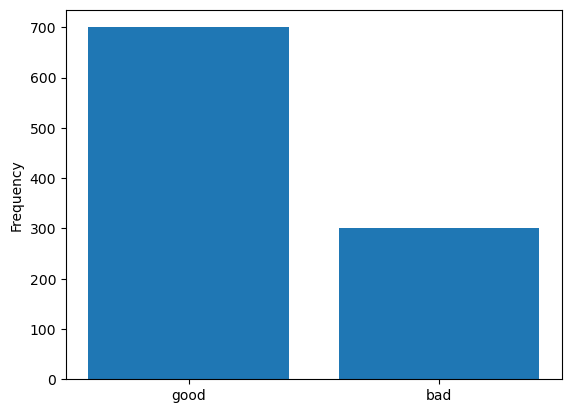

In [7]:
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt

# separate the target variable from the features
credit_target = credit['class']
credit_data = credit.drop('class', axis=1)

# plot the class distribution
class_dist = pd.Series(credit_target).value_counts()
plt.bar(class_dist.index, class_dist)
plt.ylabel("Frequency")
plt.show()


In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# list all numerical features that we want to re-scale
numeric_features = ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents']
numeric_transformer = Pipeline([ ('scaler', StandardScaler()) ])

# list all categorical features that we want to encode using OneHotEncoder
categorical_features = ['credit_history', 'purpose', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job']
categorical_transformer = Pipeline([ ('onehot', OneHotEncoder()) ])

# list all ordinal features that we want to encode using OrdinalEncoder
ordinal_features = [ 'checking_status', 'savings_status', 'employment', 'own_telephone', 'foreign_worker']
ordinal_transformer = Pipeline([ ('ordinal', OrdinalEncoder()) ])

# define the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features)])

display(preprocessor.fit_transform(credit_data))

array([[-1.23647786, -0.74513141,  0.91847717, ...,  3.        ,
         1.        ,  1.        ],
       [ 2.24819436,  0.94981679, -0.87018333, ...,  0.        ,
         0.        ,  1.        ],
       [-0.73866754, -0.41656241, -0.87018333, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [-0.73866754, -0.87450324,  0.91847717, ...,  3.        ,
         0.        ,  1.        ],
       [ 1.9992892 , -0.50552769,  0.91847717, ...,  0.        ,
         1.        ,  1.        ],
       [ 1.9992892 ,  0.46245715,  0.02414692, ...,  4.        ,
         0.        ,  1.        ]])

Run the following cell once to define the ```avg_roc``` function:

In [9]:
#define function for computing average roc for cross validation
#see http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html
from numpy import interp
from sklearn.metrics import roc_curve, auc

def avg_roc(cv, estimator, data, target, pos_label):
    mean_fpr = np.linspace(0, 1, 100) # = [0.0, 0.01, 0.02, 0.03, ... , 0.99, 1.0]
    tprs = []
    aucs = []
    
    for train_indices, test_indices in cv.split(data, target):
        train_data = data.iloc[train_indices]
        train_target = target[train_indices]
        estimator.fit(train_data, train_target)

        test_data = data.iloc[test_indices]
        test_target = target[test_indices]
        decision_for_each_class = estimator.predict_proba(test_data)#have to use predict_proba or decision_function 
    
        fpr, tpr, thresholds = roc_curve(test_target, decision_for_each_class[:,1], pos_label=pos_label)
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0 # tprs[-1] access the last element
        aucs.append(auc(fpr, tpr))
        
        #plt.plot(fpr, tpr)# plot for each fold
        
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0 # set the last tpr to 1
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    
    return mean_fpr, mean_tpr, mean_auc, std_auc

The evaluate different classifiers using the ```avg_roc``` function and plot the results:

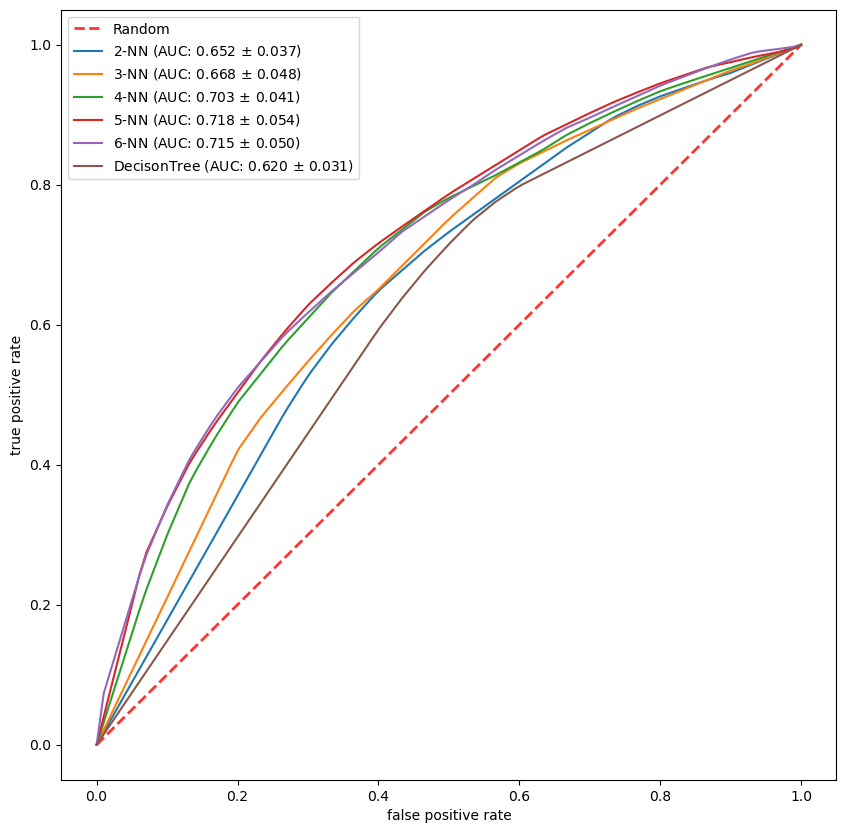

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

# define the cross validation folds
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# create the pipeline, we will set the estimator later
pipeline = Pipeline([ ('preprocessing', preprocessor), ('estimator', None) ])

# setup a figure
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=.8) # draw diagonal

# KNN
pipeline.set_params(estimator=KNeighborsClassifier())
for n_neighbour in [2,3,4,5,6]:
    pipeline.set_params(estimator__n_neighbors=n_neighbour)
    mean_fpr, mean_tpr, mean_auc, std_auc = avg_roc(cv, pipeline, credit_data, credit_target, 'good')
    plt.plot(mean_fpr, mean_tpr, label='{}-NN (AUC: {:.3f} $\pm$ {:.3f})'.format(n_neighbour, mean_auc, std_auc))
    
# Decision Tree
pipeline.set_params(estimator=DecisionTreeClassifier())
mean_fpr, mean_tpr, mean_auc, std_auc = avg_roc(cv, pipeline, credit_data, credit_target, 'good')
plt.plot(mean_fpr, mean_tpr, label='DecisonTree (AUC: {:.3f} $\pm$ {:.3f})'.format(mean_auc, std_auc))

# show the plot
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()
plt.show()

#### 4.2.2.	For the two most promising classification approaches, compute the accuracy and confusion matrix in a 10-fold CV setup. Which level of accuracy do you reach?

In [11]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

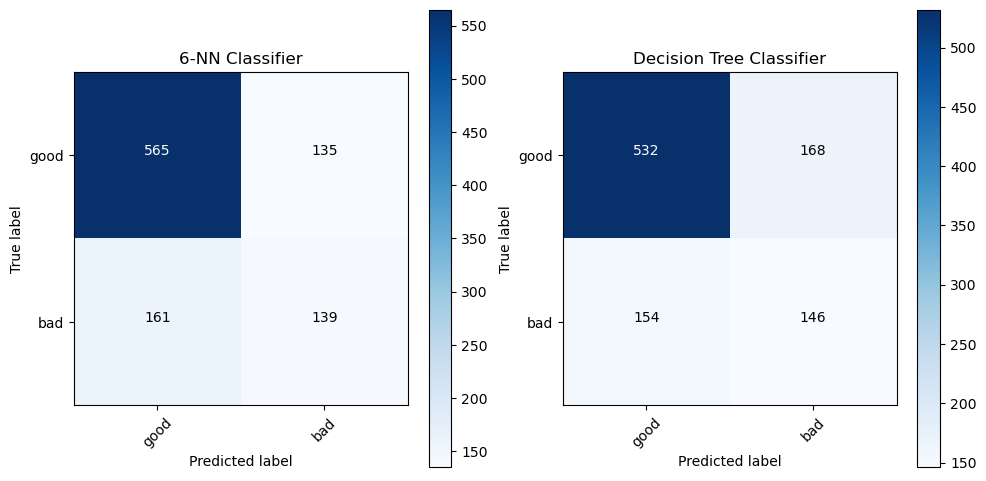

Classification Report for 6-NN Classifier:
              precision    recall  f1-score   support

         bad       0.51      0.46      0.48       300
        good       0.78      0.81      0.79       700

    accuracy                           0.70      1000
   macro avg       0.64      0.64      0.64      1000
weighted avg       0.70      0.70      0.70      1000

Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

         bad       0.46      0.49      0.48       300
        good       0.78      0.76      0.77       700

    accuracy                           0.68      1000
   macro avg       0.62      0.62      0.62      1000
weighted avg       0.68      0.68      0.68      1000



In [12]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

plt.figure(figsize=(10,5))

classes = credit_target.unique()

# KNN
plt.subplot(1,2,1)
pipeline.set_params(estimator=KNeighborsClassifier(6))
prediction = cross_val_predict(pipeline, credit_data, credit_target, cv=cv)
cnf_matrix = confusion_matrix(credit_target, prediction, labels=classes)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=classes, title='6-NN Classifier')
rep_knn = classification_report(credit_target, prediction)

# Decision Tree
plt.subplot(1,2,2)
pipeline.set_params(estimator=DecisionTreeClassifier())
prediction = cross_val_predict(pipeline, credit_data, credit_target, cv=cv)
cnf_matrix = confusion_matrix(credit_target, prediction, labels=classes)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=classes, title='Decision Tree Classifier')
rep_dt = classification_report(credit_target, prediction)

plt.show()

print("Classification Report for 6-NN Classifier:")
print(rep_knn)

print("Classification Report for Decision Tree Classifier:")
print(rep_dt)

#### 4.2.3.	What do the precision and recall values for the class “bad”  tell you? Try to improve the situation by increasing the number of “bad” examples in the training set (in the cross validation). How do precision and recall change if you apply this procedure? 

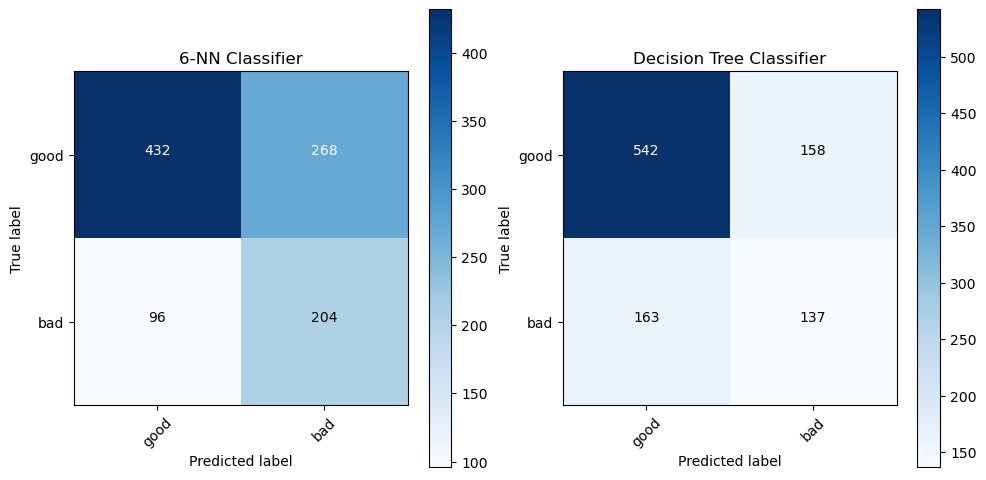

Classification Report for 6-NN Classifier:
              precision    recall  f1-score   support

         bad       0.43      0.68      0.53       300
        good       0.82      0.62      0.70       700

    accuracy                           0.64      1000
   macro avg       0.63      0.65      0.62      1000
weighted avg       0.70      0.64      0.65      1000

Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

         bad       0.46      0.46      0.46       300
        good       0.77      0.77      0.77       700

    accuracy                           0.68      1000
   macro avg       0.62      0.62      0.62      1000
weighted avg       0.68      0.68      0.68      1000



In [13]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


# create a new pipeline with balancing
pipeline = Pipeline([ ('preprocessing', preprocessor), ('balancing', RandomOverSampler()), ('estimator', None) ])

plt.figure(figsize=(10,5))

classes = credit_target.unique()

# KNN
plt.subplot(1,2,1)
pipeline.set_params(estimator=KNeighborsClassifier(6))
prediction = cross_val_predict(pipeline, credit_data, credit_target, cv=cv)
cnf_matrix = confusion_matrix(credit_target, prediction, labels=classes)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=classes, title='6-NN Classifier')
rep_knn = classification_report(credit_target, prediction)

# Decision Tree
plt.subplot(1,2,2)
pipeline.set_params(estimator=DecisionTreeClassifier())
prediction = cross_val_predict(pipeline, credit_data, credit_target, cv=cv)
cnf_matrix = confusion_matrix(credit_target, prediction, labels=classes)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=classes, title='Decision Tree Classifier')
rep_dt = classification_report(credit_target, prediction)

plt.show()

print("Classification Report for 6-NN Classifier:")
print(rep_knn)

print("Classification Report for Decision Tree Classifier:")
print(rep_dt)

#### 4.2.4.	To model a use case specific evaluation, compute the cost of all missclassifications. Set up your cost matrix by assuming that you will lose 1 Unit if you refuse a credit to a good customer, but that you lose 100 Units if you give a bad customer a credit. Rerun the experiments and evaluate the results.

In [14]:
pipeline.set_params(estimator=KNeighborsClassifier(6))
prediction = cross_val_predict(pipeline, credit_data, credit_target, cv=cv)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(credit_target, prediction, labels=credit_target.unique())
cost = cm[1][0] * 100 + cm[0][1] * 1
acc = accuracy_score(credit_target, prediction)

print("6-NN with accuracy of {} and cost {}".format(acc, cost))

6-NN with accuracy of 0.623 and cost 9881


In [15]:
pipeline.set_params(estimator=DecisionTreeClassifier())
prediction = cross_val_predict(pipeline, credit_data, credit_target, cv=cv)

cm = confusion_matrix(credit_target, prediction, labels=credit_target.unique())
cost = cm[1][0] * 100 + cm[0][1] * 1
acc = accuracy_score(credit_target, prediction)

print("Decision tree with accuracy of {} and cost {}".format(acc, cost))

Decision tree with accuracy of 0.681 and cost 16753


#### 4.2.5.	As the creation of training data is mostly a manual task and humans tend to be fallible, training data might include noise. Simulate this behavior by using the Add Noise function and change the parameter “percentage” from 0% over 10% to 20%. Is your preferred classification approach still feasible for this situation? How does the performance of the other classifiers evolve?

In [16]:
import random 
from sklearn.utils.multiclass import unique_labels
def add_noise(raw_target, percentage):    
    labels = unique_labels(raw_target)
    target_with_noise = []
    for one_target_label in raw_target:
        if random.randint(1,100) <= percentage:
            target_with_noise.append(next(l for l in labels if l != one_target_label))
        else:
            target_with_noise.append(one_target_label)
    return target_with_noise

In [17]:
for estimator in [DecisionTreeClassifier(), KNeighborsClassifier(6)]:
    for noise in [0,10,20, 30]:    
        all_test_target = []
        all_test_predition = []
        for train_indices, test_indices in cv.split(credit_data, credit_target):
            train_data, train_target = credit_data.iloc[train_indices], credit_target[train_indices]
            test_data, test_target = credit_data.iloc[test_indices], credit_target[test_indices]

            train_target = add_noise(train_target, noise)  
            pipeline.set_params(estimator=estimator)
            pipeline.fit(train_data, train_target)

            test_prediction = pipeline.predict(test_data)

            all_test_target.extend(test_target)
            all_test_predition.extend(test_prediction)
    
        print("estimator {} with {} % noise : {} accuracy".format(
            str(estimator).split("(", 1)[0], 
            noise, 
            accuracy_score(all_test_target, all_test_predition)))

estimator DecisionTreeClassifier with 0 % noise : 0.691 accuracy
estimator DecisionTreeClassifier with 10 % noise : 0.638 accuracy
estimator DecisionTreeClassifier with 20 % noise : 0.609 accuracy
estimator DecisionTreeClassifier with 30 % noise : 0.582 accuracy
estimator KNeighborsClassifier with 0 % noise : 0.641 accuracy
estimator KNeighborsClassifier with 10 % noise : 0.61 accuracy
estimator KNeighborsClassifier with 20 % noise : 0.579 accuracy
estimator KNeighborsClassifier with 30 % noise : 0.529 accuracy
